<a href="https://colab.research.google.com/github/gitmystuff/DTSC5502/blob/main/Module_10/Module_10_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 10 Activity

by Your Name

## Getting Started

* Colab - get notebook from gitmystuff DTSC5502 repository
* Save a Copy in Drive
* Remove Copy of
* Submit shared link in Canvas

### Overview

* Logarithms and Euler's Number
* Functions
  * Line
  * Quadratic
  * Exponential
  * Log Base e (Natural)
  * Sine
  * Cosine
  * Tangent
  * Hyperbolic
* Distributions
  * Normal
  * Binomial
  * Poisson
  * Gamma
* S-Curve and CDF
* Generalized Linear Models
* Linear and Logistic Regression Formulas
* Assumptions
* Polynomial Regression
* Step Functions
* Basis Functions
* Local Regression
* Regression Splines
* Smoothing Splines
* Generalized Additive Models

## Logarithms and Euler's Number

### Logarithms

* Logarithms are the inverse of exponentials
* $10^3 = 1000$ and $log_{10}(1000) = 3$
* When data units need scaling
* Expressing large numbers
* $y = ax^n$ is like $log(y) = n log(x) + log(a)$
* Reduces finding n to a linear equation
* $y = a e^{bx}$ is like $log(y) = bx + log(a)$

Types of logarithms

* Binary: computer science (0s and 1s), music theory (distance between stacked notes)
* Natural (Euler): chemistry, economics, comparing age of a dog to human
* Common (10): sound, pH, electricity, light

Sources

* https://math.stackexchange.com/questions/35810/intuitive-use-of-logarithms
* https://www.snexplores.org/article/explainer-what-are-logarithms-exponents


Examples:

* $log_{10}(10)=1$
* $log_{10}(100)=2$
* etc
* numpy log10
* numpy log default is natural log

In [ ]:
# log table

In [ ]:
# get the data
import pandas as pd

moores = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv', header=None)
moores.columns = ['year', 'transistors']
print(moores.head())
print(moores.tail())

# plot the data


   year  transistors
0  1971         2300
1  1972         3500
2  1973         2500
3  1973         2500
4  1974         4100
     year  transistors
157  2017  18000000000
158  2017  19200000000
159  2018   8876000000
160  2018  23600000000
161  2018   9000000000


In [ ]:
# apply log to transistors


### Euler's Number (e)

* $e = 1 + 1/1 + 1/2 + 1/3! + 1/4! + ... + 1/n!$
* Compound interest (like exponential growth) $FV = PV e^{rt}
* where FV is Future Value, PV is Present Value, e is Euler's Number, r is Interest Rate Compounded, and t is time

In [ ]:
# $1000 investment with 2% interest over 3 years


In [ ]:
# Investing $1000 with 10 percent continuous compound interest over 40 years


In [ ]:
# 10 percent compound interest over 50 years and annual contributions of $2400 (monthly $200 contributions)
# https://math.stackexchange.com/questions/4475485/compound-interest-including-contributions


## Functions

### Examples

* See Functions Notebook

## Distributions

### Distribution Plots and Shapiro-Wilk Test (Normal)

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6676026/#:~:text=The%20purpose%20of%20the%20t,essential%20in%20the%20t%2Dtest

The Shapiro–Wilk test is a test of normality. It was published in 1965 by Samuel Sanford Shapiro and Martin Wilk.

https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

If the p-value of the test is greater than α = .05, then the data is assumed to be normally distributed.

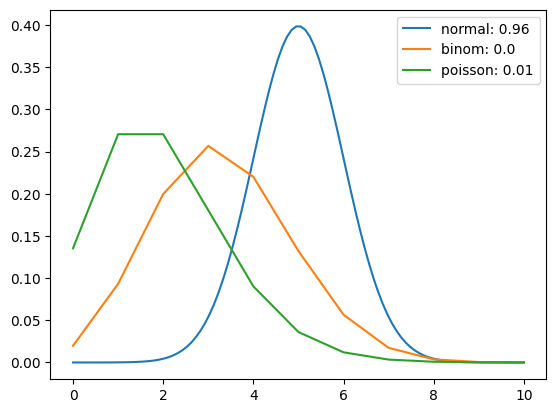

In [ ]:
# https://levelup.gitconnected.com/probability-distributions-using-scipy-58fdab53d7ac
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# normal
n = 100
x = np.linspace(0, 10, n)
y = stats.norm.pdf(x, 5, 1)
dist = stats.norm().rvs(1000)
plt.plot(x, y, label=f'normal: {round(stats.shapiro(dist).pvalue,2)}')

# binom
x = np.arange(0,11)
y = stats.binom(n=len(x), p=.3).pmf(x)
dist = stats.binom(n=len(x), p=.3).rvs(1000)
plt.plot(x, y, label=f'binom: {round(stats.shapiro(dist).pvalue,2)}')


# poisson
x = np.arange(0,11)
y = stats.poisson(mu=2).pmf(x)
dist = stats.poisson(mu=2).rvs(1000)
plt.plot(x, y, label=f'poisson: {round(stats.shapiro(y).pvalue,2)}')

plt.legend();

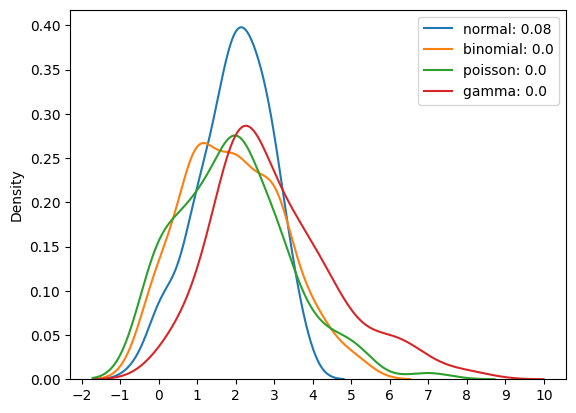

In [ ]:
from numpy.lib import bincount
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats as stats

n = 100
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

# normal
norm = np.random.normal(2, 1, size=n)
sns.kdeplot(norm, label=f'normal: {round(stats.shapiro(norm).pvalue,2)}', ax=ax)

# binomial
bino = np.random.binomial(10, .2, size=n)
sns.kdeplot(bino, label=f'binomial: {round(stats.shapiro(bino).pvalue,2)}', ax=ax)

# poisson
pois = np.random.poisson(2, n)
sns.kdeplot(pois, label=f'poisson: {round(stats.shapiro(pois).pvalue,2)}', ax=ax)

# gamma
gamma = np.random.gamma(3, 1, n)
sns.kdeplot(gamma, label=f'gamma: {round(stats.shapiro(gamma).pvalue,2)}', ax=ax)

plt.legend();

### Probability Density Function

* When normal, we get significance, confidence, p-values, power, alpha, z-scores, etc
* When not normal, normal pdf won't work, e.g., for a Poisson distribution use the Poisson pdf (stats.poisson.pdf) (cdf, ppf, pmf, etc)
* What is a distribution appropriate for social media when trying to make inferences back the whole population?
* The probabilities associated with extreme values on a normal distribution will probably not be the same for other distributions (beta, poisson, gamma, etc)

### Practical Examples of Distributions

* Normal: natural phenomena of one variate
* Binomial: counting, gambling
* Poisson: events happening in a period of time
* Gamma: time to failure in mechanics, reliability in a piece of technology

### S-Curve and CDF

4.0


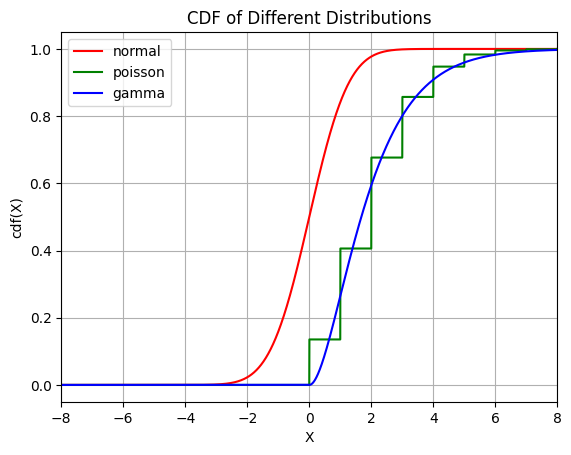

In [ ]:
# plot the cdf
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

n = 10000
bound = 8
x = np.linspace(-bound, bound, n)
plt.plot(x, stats.norm.cdf(x), 'r', label='normal')

plt.plot(x, stats.poisson.cdf(x, 2), 'g', label='poisson')
print(stats.poisson.ppf(.9, 2))
plt.plot(x, stats.gamma.cdf(x, 2), 'b', label='gamma')
plt.title('CDF of Different Distributions')
plt.xlabel('X')
plt.xlim(-bound, bound)
plt.ylabel('cdf(X)')
plt.grid(True)
plt.legend();



## Generalized Linear Models

* https://www.youtube.com/watch?v=SqN-qlQOM5A&t=18s

### Model Responses

Quantitative Response

* $y = \theta^T X + \epsilon_i$ (matrix form)
* where $\epsilon \overset{iid}{\sim} \mathcal{N}(0, \sigma^2)$
* and $\epsilon$ is model noise and generally unknown

Binary Response

* $p(y=1) = \Large\frac{1}{1 + e^{-(\theta^T X)}}$

Generalized Linear Model

* Other responses include non-negative, skewed, etc
* Framework for different response types
* Useful when models violate assumptions
* See Assumptions Notebook



In [ ]:
# test of normality
from sklearn.datasets import make_regression
import scipy.stats as stats

for _ in range(0, 10):
  X, y = make_regression(n_samples=1000, n_features=10, n_informative=6)
  print(stats.shapiro(y))

cnt = 0
for _ in range(0, 100):
  X, y = make_regression(n_samples=1000, n_features=1)
  if stats.shapiro(y).pvalue >= .05 and stats.shapiro(X).pvalue >= .05:
    cnt += 1

print()
print(cnt)

ShapiroResult(statistic=0.9992840886116028, pvalue=0.9755295515060425)
ShapiroResult(statistic=0.9991645812988281, pvalue=0.9437131881713867)
ShapiroResult(statistic=0.9987448453903198, pvalue=0.7185968160629272)
ShapiroResult(statistic=0.9987128973007202, pvalue=0.6972166895866394)
ShapiroResult(statistic=0.9975616931915283, pvalue=0.14326757192611694)
ShapiroResult(statistic=0.9968883395195007, pvalue=0.047497376799583435)
ShapiroResult(statistic=0.998943030834198, pvalue=0.8423691987991333)
ShapiroResult(statistic=0.9990555047988892, pvalue=0.9002328515052795)
ShapiroResult(statistic=0.9987570643424988, pvalue=0.7267276048660278)
ShapiroResult(statistic=0.9987488389015198, pvalue=0.7212457060813904)

94


### The General Linear Model

$y = \beta_0 + \beta_1 X + e$ or Outcome = Intercept + Slope x Predictor + $e$

* $y = \beta_0 + e$: one sample t test
* $y = \beta_0 + \beta_1 Group + e$: independent t
* $y1 - y2 = \beta_0 + e$: paired
* $y = \beta_0 + \beta_1 Group_1 + \beta_2 Group_2 + e$: anova

Intercepts and Slopes vs Means and Mean Differences

* Intercept $\sim$ Mean
* Slope $\sim$ Mean Differences

### Generalized Linear Model Components

* Random Component - probability distribution
* Systematic Component - coefficients + explanatory variables
* Link Function - transforms (relates) the mean to the explanatory variables

### Model Parameters

* Gaussian (mean ($\mu$) and variance ($\sigma^2$))
* Binomial (independent trials ($n$) and success ($p$))
* Poisson Regression Model (mean and variance are equal)
* Gamma ($\alpha$ = shape, $\beta$ = rate)
* Negative-Binomial (similar to Poisson but uses $\alpha$ as a shape parameter)
* Inverse Gaussian (mean ($\mu$) and shape ($\lambda$)

### Link Functions

Allows the linear model to be related to the response variable by transforming the output of the response to fit the model boundaries.

$\eta$ = link

* linear: $\eta (\mu) = \mu$
* logistic: $\eta(\mu) = log(\mu/(1-\mu))$
* poisson: $\eta(\mu) = log(\mu)$

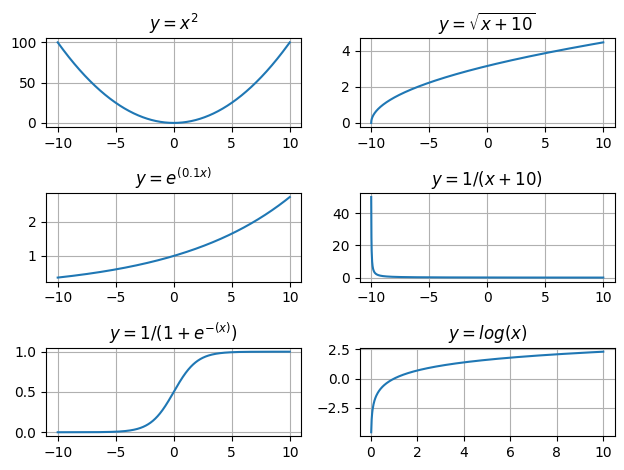

In [ ]:
# link functions
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

x = np.linspace(-10, 10, 1000)

y = x ** 2
ax1.grid()
ax1.plot(x, y)
ax1.title.set_text(r'$y=x^2$')
# ax1.title.set_text('y=x^2')

y = np.sqrt(x+10)
ax2.grid()
ax2.plot(x, y)
ax2.title.set_text(r'$y=\sqrt{x+10}$')
# ax2.title.set_text('y=sqrt(x)')

y = np.e**(0.1*x)
ax3.grid()
ax3.plot(x, y)
ax3.title.set_text(r'$y=e^{(0.1x)}$')
# ax3.title.set_text('y=e^(0.1x)')

y = 1/(x+10)
ax4.grid()
ax4.plot(x, y)
ax4.title.set_text(r'$y=1/(x+10)$')
# ax4.title.set_text('y=1/(x+10)')

y = 1/(1 + np.e**-(x))
ax5.grid()
ax5.plot(x, y)
ax5.title.set_text(r'$y=1/(1+e^{-(x)})$')
# ax5.title.set_text('y=1/(1+e^-(x)')

y = np.log(x)
ax6.grid()
ax6.plot(x, y)
ax6.title.set_text(r'$y=log(x)$')
# ax6.title.set_text('y=log(x)')
plt.tight_layout();

## Non Linear Models

The truth is never linear!

### Polynomial Regression

* See More Regressions Notebook


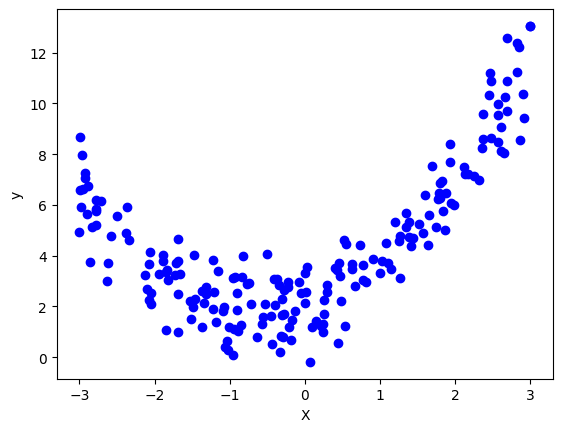

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = 6 * np.random.rand(200, 1) - 3
noise = np.random.normal(0, 1, X.shape)
y = 0.8*X**2 + 0.9*X + 2 + noise

plt.scatter(X, y, color='blue')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Step Functions / Piecewise Linear Fit

Cutting a variable into distinct regions


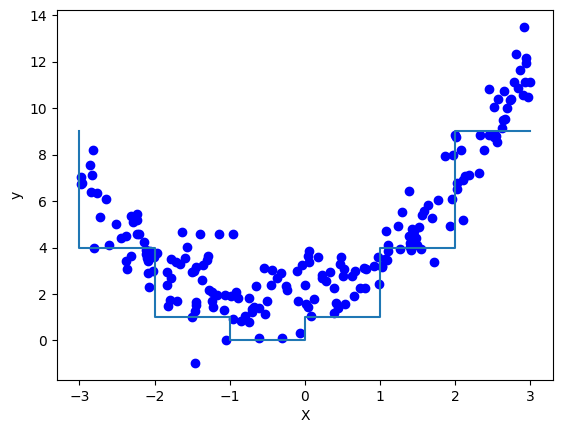

In [ ]:
# https://stackoverflow.com/questions/29382903/how-to-apply-piecewise-linear-fit-in-python
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

X = 6 * np.random.rand(200, 1) - 3
noise = np.random.normal(0, 1, X.shape)
y = 0.8*X**2 + 0.9*X + 2 + noise

plt.scatter(X, y, color='blue')

def piecewise_linear(x, x0, y0, k1, k2):
  return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

sX = [-3, -2, -1, 0, 1, 2, 3]
# sX = np.linspace(-3, 3, 10)
sy = [i**2 for i in sX]
plt.step(sX, sy, where='pre')

# p , e = optimize.curve_fit(piecewise_linear, sX, sy)
# plt.plot(sX, piecewise_linear(sX, *p))

plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
# polynomial regression and step functions
# https://www.science.smith.edu/~jcrouser/SDS293/labs/lab12-py.html
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

X = 6 * np.random.rand(200, 1) - 3
noise = np.random.normal(0, 1, X.shape)
y = 0.8*X**2 + 0.9*X + 2 + noise

d = {'X': X.flatten(), 'y': y.flatten()}
df = pd.DataFrame(d)

X1 = PolynomialFeatures(1).fit_transform(df.X.values.reshape(-1,1))
X2 = PolynomialFeatures(2).fit_transform(df.X.values.reshape(-1,1))
X3 = PolynomialFeatures(3).fit_transform(df.X.values.reshape(-1,1))
X4 = PolynomialFeatures(4).fit_transform(df.X.values.reshape(-1,1))
X5 = PolynomialFeatures(5).fit_transform(df.X.values.reshape(-1,1))

fit1 = sm.GLS(y, X4).fit()
print(fit1.summary())


                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            GLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     403.7
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           4.00e-93
Time:                        17:53:44   Log-Likelihood:                -271.53
No. Observations:                 200   AIC:                             553.1
Df Residuals:                     195   BIC:                             569.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8469      0.126     14.654      0.0

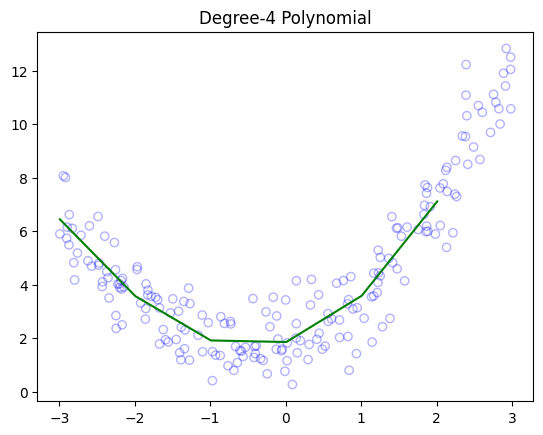

In [ ]:
# Create response matrix
import pandas as pd

resp_mx = (df.y > 3).map({False:0, True:1})

# GLM families comprise a link function as well as a mean-variance relationship
clf = sm.GLM(resp_mx, X4, family=sm.families.Binomial(sm.families.links.Logit()))
res = clf.fit()

# Generate a sequence of X values spanning the range
X_grid = np.arange(df.X.min(), df.X.max()).reshape(-1, 1)

# Generate test data
X_test = PolynomialFeatures(4).fit_transform(X_grid)

# Predict the value of the generated X
pred1 = fit1.predict(X_test)

# Create plots
plt.title('Degree-4 Polynomial')

# Scatter plot with polynomial regression line
plt.scatter(df.X, df.y, facecolor='None', edgecolor='b', alpha=0.3)
plt.plot(X_grid, pred1, color = 'g')
plt.show()

In [ ]:
# generalized least squares
fit_1 = fit = sm.GLS(df.X, X1).fit()
fit_2 = fit = sm.GLS(df.X, X2).fit()
fit_3 = fit = sm.GLS(df.X, X3).fit()
fit_4 = fit = sm.GLS(df.X, X4).fit()
fit_5 = fit = sm.GLS(df.X, X5).fit()

print(sm.stats.anova_lm(fit_1, fit_2, fit_3, fit_4, fit_5, typ=1))

   df_resid           ssr  df_diff       ss_diff           F    Pr(>F)
0     198.0  2.023937e-28      0.0           NaN         NaN       NaN
1     197.0  1.270389e-28      1.0  7.535477e-29    0.012265  0.911931
2     196.0  9.103060e-29      1.0  3.600829e-29    0.005861  0.939056
3     195.0  3.414588e-27      1.0 -3.323557e-27   -0.540939  1.000000
4     194.0  1.191946e-24      1.0 -1.188532e-24 -193.444245  1.000000


In [ ]:
# step functions
df_cut, bins = pd.cut(df.X, 4, retbins = True, right = True)
df_cut.value_counts(sort = False)

df_steps = pd.concat([df.X, df_cut, df.y], keys = ['X','X_cuts','y'], axis = 1)

# Create dummy variables for the age groups
df_steps_dummies = pd.get_dummies(df_steps['X_cuts'])

# Statsmodels requires explicit adding of a constant (intercept)
df_steps_dummies = sm.add_constant(df_steps_dummies)

# Drop the (17.938, 33.5] category
df_steps_dummies = df_steps_dummies.drop(df_steps_dummies.columns[1], axis = 1)

df_steps_dummies.head(5)

,const,"(-1.497, -0.00348]","(-0.00348, 1.49]","(1.49, 2.984]"
0,1.0,0,0,0
1,1.0,0,0,1
2,1.0,0,0,0
3,1.0,0,0,0
4,1.0,0,0,1


In [ ]:
fit2 = sm.GLM(df_steps.y, df_steps_dummies).fit()
print(fit2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  200
Model:                            GLM   Df Residuals:                      196
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                          2.4160
Method:                          IRLS   Log-Likelihood:                -369.98
Date:                Fri, 27 Oct 2023   Deviance:                       473.53
Time:                        17:53:45   Pearson chi2:                     474.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9109
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.3446      0

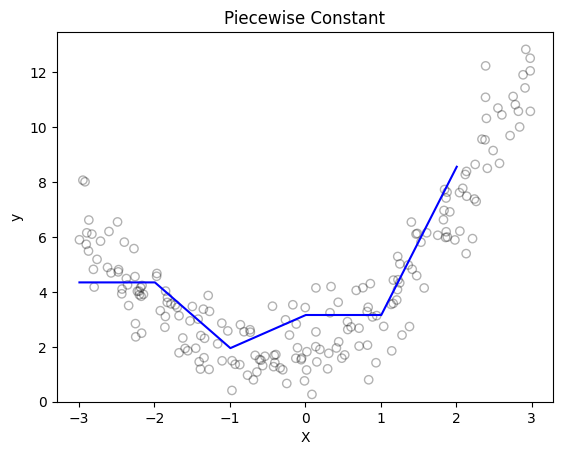

In [ ]:
# Put the test data in the same bins as the training data.
bin_mapping = np.digitize(X_grid.ravel(), bins)

# Get dummies, drop first dummy category, add constant
X_test2 = sm.add_constant(pd.get_dummies(bin_mapping).drop(1, axis = 1))

# Predict the value of the generated ages using the linear model
predictions = fit2.predict(X_test2)

# # And the logistic model
# clf2 = sm.GLM(y, df_steps_dummies, family=sm.families.Binomial(sm.families.links.logit()))
# res2 = clf2.fit()
# pred3 = res2.predict(X_test2)

# Plot
plt.title('Piecewise Constant')

# Scatter plot with polynomial regression line
plt.scatter(df.X, df.y, facecolor = 'None', edgecolor = 'k', alpha = 0.3)
plt.plot(X_grid, predictions, c = 'b')

plt.xlabel('X')
plt.ylabel('y')
plt.ylim(ymin = 0)
plt.show()


### Basis Functions

* Family of functions or transformations that can be applied to X
* Examples include polynomials, piece-wise constant functions, wavelets for Fourier series, and regression splines

## Splines

Splines create smooth curves out of irregular data points

Source

* https://towardsdatascience.com/data-science-deciphered-what-is-a-spline-18632bf96646

### Piecewise Polynomials, Knots, Splines, and Interpolation

* An alternative to fit all data points with a single polynomial curve, is to fit segments to different parts of the data, with breakpoints (knots) at pre-determined places
* Connect the knots with lines (polynomial lines if needed)
* Smooth out the fitted curve
* In essence, splines are piecewise polynomials, joined at points called knots

Source

* https://bookdown.org/tpinto_home/Beyond-Linearity/piecewise-regression-and-splines.html

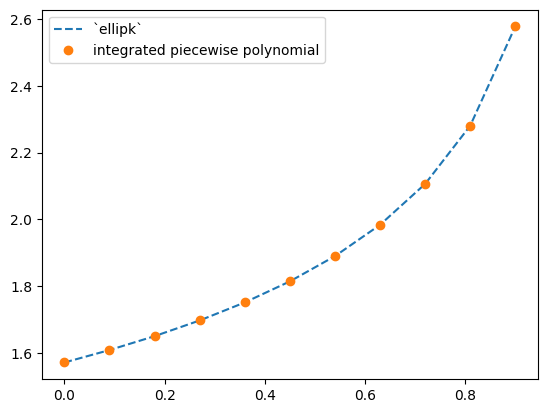

In [ ]:
# https://docs.scipy.org/doc/scipy/tutorial/interpolate/splines_and_polynomials.html
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator
from scipy.special import ellipk

m = np.linspace(0, 0.9, 11)
x = np.linspace(0, np.pi/2, 70)
y = 1 / np.sqrt(1 - m[:, None]*np.sin(x)**2)

spl = PchipInterpolator(x, y, axis=1)  # the default is axis=0

plt.plot(m, spl.integrate(0, np.pi/2), '--')
plt.plot(m, ellipk(m), 'o')
plt.legend(['`ellipk`', 'integrated piecewise polynomial'])
plt.show()

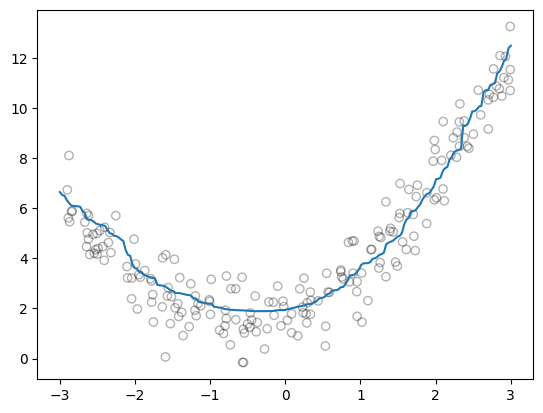

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator

m = np.linspace(-3, 3, 200)
x = 6 * np.random.rand(200, 1) - 3
noise = np.random.normal(0, 1, x.shape)
x = np.sort(x.flatten())
y = [0.8*i**2 + 0.9*i + 2 + noise for i in x]

X1 = 6 * np.random.rand(200, 1) - 3
y1 = 0.8*X1**2 + 0.9*X1 + 2 + noise

spl = PchipInterpolator(x, y, axis=1)  # the default is axis=0

plt.scatter(X1, y1, facecolor = 'None', edgecolor = 'k', alpha = 0.3)
plt.plot(m, spl.integrate(0, np.pi/3))

plt.show()

Interpolation is a method of estimating unknown data points in a known range to make the curve smoother. Univariate interpolation is a type of curve fitting that seeks the curve that best fits a set of two-dimensional data points. Since the data points are sampled from a single variable function, it is called univariate interpolation.

SciPy API provides several functions to implement the interpolation method for a given data. In this tutorial, you'll learn how to apply interpolation for a given data by using interp1d, CubicSpline, PchipInterpolator, and Akima1DInterplator methods in Python. The tutorial covers;

* Preparing test data
* interp1d  method
* CubicSpline method
* PchipInterpolator  method
* Akima1DInterpolator method
* Source code listing

Source

* https://www.datatechnotes.com/2022/12/univariate-interpolation-examples-in.html

### Smoothing Splines

* For the interpolation problem, the task is to construct a curve which passes through a given set of data points. This may be not appropriate if the data is noisy: we then want to construct a smooth curve, g(x), which approximates the input data without passing through each point exactly. To this end, scipy.interpolate allows constructing smoothing splines, based on the Fortran library FITPACK by P. Dierckx.
* splrep: Spline interpolation requires two essential steps: (1) a spline representation of the curve is computed, and (2) the spline is evaluated at the desired points.
* BSpline: A basis spline is a nonlinear function constructed of flexible bands that pass through control points to create a smooth curve.

Sources

* https://docs.scipy.org/doc/scipy/tutorial/interpolate/smoothing_splines.html
* https://apmonitor.com/wiki/index.php/Main/ObjectBspline

In [ ]:
# https://docs.scipy.org/doc/scipy/tutorial/interpolate/smoothing_splines.html
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, BSpline

x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/16)
rng = np.random.default_rng()
y =  np.sin(x) + 0.4*rng.standard_normal(size=len(x))

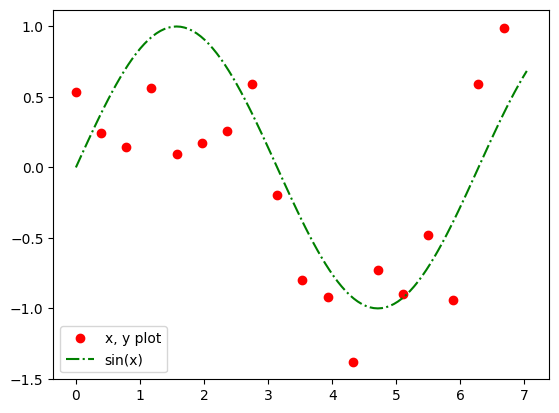

In [ ]:
tck = splrep(x, y, s=0) # s is used to specify the amount of smoothing to perform; 0 is no smoothing
tck_s = splrep(x, y, s=len(x))

xnew = np.arange(0, 9/4, 1/50) * np.pi
plt.plot(x, y, 'o', label = 'x, y plot', color='r') # 1
plt.plot(xnew, np.sin(xnew), '-.', label='sin(x)', color='g') # 2
# plt.plot(xnew, BSpline(*tck)(xnew), '-', label='s=0', color='b') # 3
# plt.plot(xnew, BSpline(*tck_s)(xnew), '-', label=f's={len(x)}', color='k') # 4

plt.legend()
plt.show()

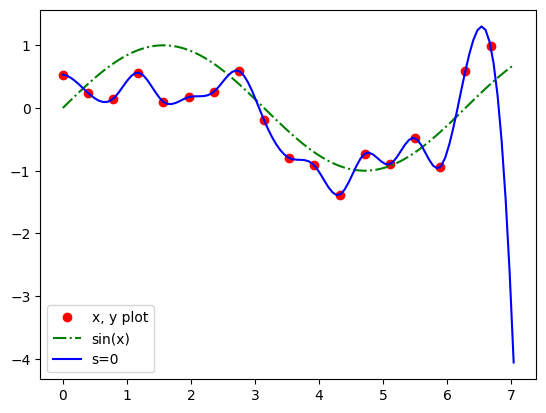

In [ ]:
plt.plot(x, y, 'o', label = 'x, y plot', color='r') # 1
plt.plot(xnew, np.sin(xnew), '-.', label='sin(x)', color='g') # 2
plt.plot(xnew, BSpline(*tck)(xnew), '-', label='s=0', color='b') # 3
# plt.plot(xnew, BSpline(*tck_s)(xnew), '-', label=f's={len(x)}', color='k') # 4

plt.legend()
plt.show()

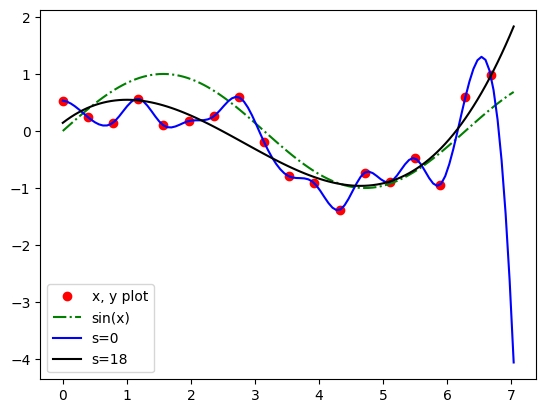

In [ ]:
plt.plot(x, y, 'o', label = 'x, y plot', color='r') # 1
plt.plot(xnew, np.sin(xnew), '-.', label='sin(x)', color='g') # 2
plt.plot(xnew, BSpline(*tck)(xnew), '-', label='s=0', color='b') # 3
plt.plot(xnew, BSpline(*tck_s)(xnew), '-', label=f's={len(x)}', color='k') # 4

plt.legend()
plt.show()

### Cubic Spline

* Cubic spline interpolation is a way of finding a curve that connects data points with a degree of three or less

Source

* https://www.geeksforgeeks.org/cubic-spline-interpolation/

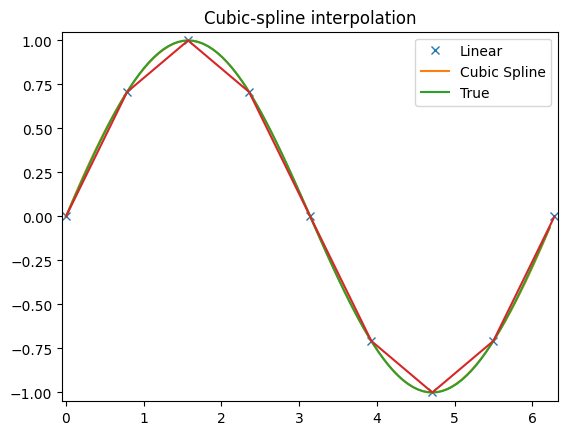

In [ ]:
# https://docs.scipy.org/doc/scipy/tutorial/interpolate/smoothing_splines.html
import matplotlib.pyplot as plt
from scipy import interpolate

x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)
tck = interpolate.splrep(x, y, s=0)
xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = interpolate.splev(xnew, tck, der=0)

plt.figure()
plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y)
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation')
plt.show()

## Local Regression

* Local regression is a diferent approach for ftting fexible non-linear func- local regression tions, which involves computing the ft at a target point x0 using only the nearby training observations
* Check out Python LOWESS (Locally Weighted Scatterplot Smoothing)
* https://www.google.com/imgres?imgurl=https%3A%2F%2Fmiro.medium.com%2Fv2%2Fresize%3Afit%3A928%2F1*H3QS05Q1GJtY-tiBL00iug.png&tbnid=z0DKwyhWlDC45M&vet=12ahUKEwiOna6PwJSCAxUH3MkDHWOIA8oQMygAegQIARBW..i&imgrefurl=https%3A%2F%2Ftowardsdatascience.com%2Flocally-weighted-linear-regression-in-python-3d324108efbf&docid=nFD3cy7xVIYQVM&w=928&h=704&q=local%20regression%20python%20example&ved=2ahUKEwiOna6PwJSCAxUH3MkDHWOIA8oQMygAegQIARBW

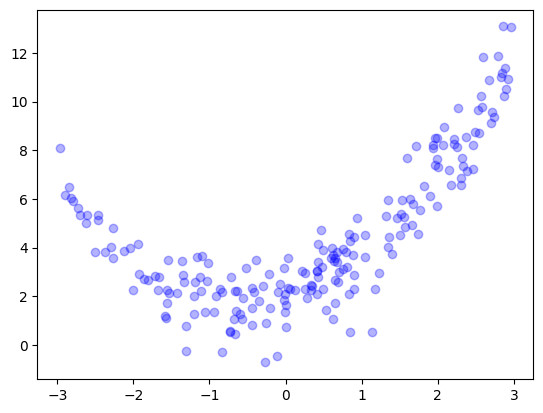

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = 6 * np.random.rand(200) - 3
noise = np.random.normal(0, 1, X.shape)
y = 0.8*X**2 + 0.9*X + 2 + noise

plt.scatter(X, y, color='blue', alpha=0.3);

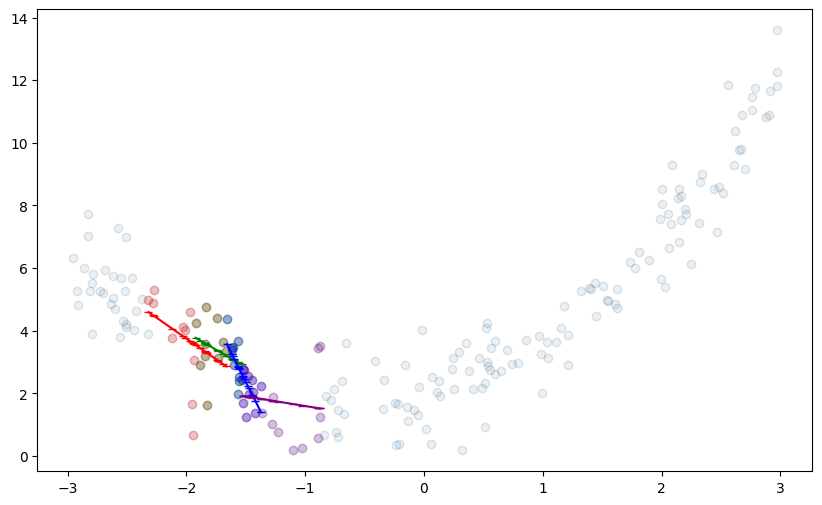

In [ ]:
# https://james-brennan.github.io/posts/lowess_conf/
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

x = 6 * np.random.rand(200) - 3
noise = np.random.normal(0, 1, x.shape)
y = 0.8*x**2 + 0.9*x + 2 + noise
y_vector = np.hstack(y)

plt.figure(figsize=(10,6))
plt.scatter(x, y, edgecolors='black', color=None, alpha=0.1);

order = np.argsort(x)
b = 10
colors = ['red', 'green', 'blue', 'purple']
for i, k in enumerate([40, 50, 60, 70]):
  xx = x[order][k-b:k+b]
  yy = y_vector[order][k-b:k+b]
  plt.scatter(xx, yy, marker='o', color=colors[i], alpha=0.2)
  res = scipy.stats.linregress(xx, yy)
  plt.plot(xx, res.intercept + res.slope *xx, marker='_', color=colors[i])

## Generalized Additive Models

* Allows for flexible nonlinearities in several variables, but retains the additive structure of linear models
* Can fit a GAM using splines, smoothing splines, local regression
* Coefficients not interesting; fitted functions are
* Can mix terms, linear, nonlinear
* $g(E(y)) = \beta_0 + f_1(X_1) + f_2(x_2) + ... + f_m(x_m)$

In [ ]:
# https://www.kaggle.com/code/carlmcbrideellis/classification-using-generalized-additive-models
import pandas as pd

address = 'https://raw.githubusercontent.com/gitmystuff/Datasets/main/titanic_with_names.csv'


In [ ]:
# create df with just ['sex', 'pclass', 'age', 'survived', 'name']


In [ ]:
# train test split

In [ ]:
# !pip install pygam

In [ ]:
# from pygam import LogisticGAM, s, f

# # s = spline term for each feature
# model = LogisticGAM(s(0) + s(1) + s(2)).fit(X_train.drop('name', axis=1), y_train)
# predictions = model.predict(X_test.drop('name', axis=1))

# print(model.summary())
# print()
# print('Accuracy')
# print(model.accuracy(X_test.drop('name', axis=1), y_test))

In [ ]:
# visualize the four splines
# import matplotlib.pyplot as plt
# for i, term in enumerate(model.terms):
#   if term.isintercept:
#     continue
#   plt.plot(model.partial_dependence(term=i), label=f'{X_test.columns[i]} - s({i})')

# plt.legend();

In [ ]:
# evaluate our model
# def comp_cols(row):
#   return int(int(row.Survived) == int(row.Predicted))

# survivors = pd.DataFrame ({'Name': X_test.name, 'Survived': y_test, 'Predicted': predictions})
# survivors['comp'] = survivors.apply(comp_cols, axis=1)
# print(survivors.shape)
# print(sum(survivors['comp']))
# print(sum(survivors['comp']) / survivors.shape[0])
# survivors.head()

## What Did You Get Out Of This Activity?